# Принятие решений в бизнесе.

<p></p>

<div style="border:solid black 1px; padding: 20px">В моём распоряжении три датасета. Файл hypothesis.csv хранит данные для приоритезации гипотезы, orders.csv — информацию о заказах, а visitors.csv — информацию для A/B-теста.</div>

<p></p>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Цель исследования.</b></font>
    <br />
    <br />
    <font color='778899'> Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Задачи исследования.</b></font>
    <br />
    <br />
    <font color='778899'> 1) Выгрузить данные. <br />
    2) Изучить данные. <br />
    3) Предобработка данных. <br />
    4) Применить фреймворк ICE для приоритизации гипотез. <br />
    5) Применить фреймворк RICE для приоритизации гипотез.<br />
    6) Анализ и сравнение выводов. <br /> 
    7) Проанализировать A/B-тест. <br />
    8) Принять решение по результатам теста. <br /> </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Исходные данные.</b></font>
    <br />
    <br />

<font color='778899'> <font color='20B2AA'><b>Данные для первой части: </b></font><br /><br />
Файл /datasets/hypothesis.csv. <br />
Hypothesis — краткое описание гипотезы;<br />
Reach — охват пользователей по 10-балльной шкале;<br />
Impact — влияние на пользователей по 10-балльной шкале;<br />
Confidence — уверенность в гипотезе по 10-балльной шкале;<br />
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br />
<br />
<font color='20B2AA'><b>Данные для второй части:</b></font> <br /><br />
Файл /datasets/orders.csv.<br />
transactionId — идентификатор заказа;<br />
visitorId — идентификатор пользователя, совершившего заказ;<br />
date — дата, когда был совершён заказ;<br />
revenue — выручка заказа;<br />
group — группа A/B-теста, в которую попал заказ.<br />
Файл /datasets/visitors.csv. <br />
date — дата;<br />
group — группа A/B-теста;<br />
visitors — количество пользователей в указанную дату в указанной группе A/B-теста </b></font> <p></p>
</div>

### Загрузка данных и подготовка их к анализу.

#### Загрузка данных.

In [1]:
#Импортирую библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
#Открываю файлы с данными.
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

#### Изучение данных.

In [3]:
#Использую метод info()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
#Вывожу сумму пропусков
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [7]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [8]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p>Смотря на информацию о датафреймах, можно заметить, что нет пропусков. Это большой плюс. Нужно изменить тип данных в колонках с датой и временем.

#### Предобработка данных.

##### Проверка на явные дубликаты.

In [9]:
hypothesis[hypothesis.duplicated()].sum()

Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

In [10]:
orders[orders.duplicated()].sum()

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [11]:
visitors[visitors.duplicated()].sum()

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [12]:
##### Проверка на скрытые дубликаты.

In [13]:
# создаем массив уникальных пар значений дат и групп теста, посчитаем дубликаты
#orders[['date', 'group']].duplicated().sum()

In [14]:
#удаление дубликатов
#datesGroups = orders[['date', 'group']].drop_duplicates()

##### Изменение типа данных

In [15]:
# преобразуем данные о времени с помощью pd.to_datetime()
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
print('\nДата начала эксперимента {}\nКонечная дата {}\n'.format(visitors['date'].min(),visitors['date'].max()))


Дата начала эксперимента 2019-08-01 00:00:00
Конечная дата 2019-08-31 00:00:00



**Вывод** 
<p></p>
<div style="border:solid green 2px; padding: 20px"> 
Провела предобработку данных: <br />
1) Пропусков нет. <br />
2) Явных дубликатов нет. <br />
3) На неявные дубликаты проверять нецелесобразно. <br />
4) Изменила тип данных о времени.<br />
5) Эксперимент длится месяц. С 1 августа 2019г по 31 августа 2019г.   
</div>

In [16]:
def proc(x):
    return x.info()
proc(hypothesis)
#proc(orders)
#proc(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Часть 1. Приоритизация гипотез.

#### Применение фреймворка ICE для приоритизации гипотез.

In [17]:
hypothesis['ICE']=hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'] #обычные математические опреции по формуле

In [18]:
pd.set_option('display.max_colwidth', None) #метод для вывода всего названия гипотез без сокращения
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False) #сортировка

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


#### Применение фреймворка RICE для приоритизации гипотез.

In [19]:
hypothesis['RICE']=hypothesis['Impact']*hypothesis['Confidence']*hypothesis['Reach']/hypothesis['Efforts']

In [20]:
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [21]:
hypothesis #вывожу таблицу для анализа 

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


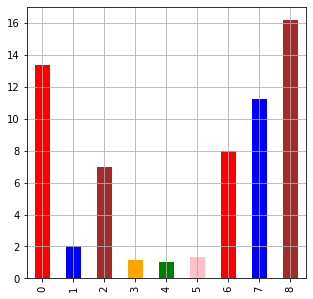

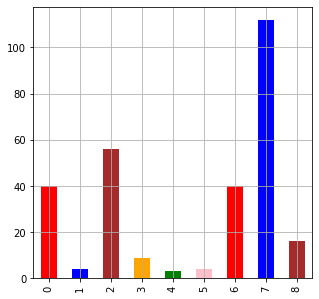

In [22]:
#строю график для наглядности

bar_colors = ['red', 'blue', 'brown', 'orange', 'green', 'pink']
hypothesis['ICE'].plot(kind='bar', grid=True, figsize=(5,5), color=bar_colors)
plt.show()
hypothesis['RICE'].plot(kind='bar', grid=True, figsize=(5,5), color=bar_colors)
plt.show()

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Вэтом выводе я буду использовать порядковый номер из датафрейма hypothesis для обозначения гипотез. Наиболее перспективные гипотезы по ICE: 8, 0, 7. По RICE: 7 ,2, 0, 6.<p></p> 8 гипотеза (Запустить акцию, дающую скидку на товар в день рождения) хороша, но охват очень маленький, всего на единицу. Охват и повлиял на разницу в приоритезации ICE и RICE.<p></p> 0 гипотеза (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) стоит отдельного внимания. Impact 10 баллов! Хотя охват пользователей небольшой, но зато влияние обновление окажет на всех.<p></p> 7 гипотеза (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) однозначно в приоритете. Подписаться сможет каждый, и для всех подписанных будет рассылка. 

### Часть 2. Анализ A/B-теста.

In [23]:
dub_v = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(),
orders.query('group == "B"')['visitorId'].unique())
dub_v.shape[0]

58

In [24]:
orders = orders.query('visitorId not in @dub_v')

#### График кумулятивной выручки по группам.

In [25]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [26]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'] 
            #Получим строки таблицы orders,
            #дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups
        )
    ].agg( #агрегируем значения
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1, #применим методы к каждой строке датафрейма с помощью apply выше
).sort_values(by=['date', 'group']) #отсортируем результаты по столбцам 'date' и 'group'

In [27]:
#Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [28]:
#Объединим обе таблицы в одну с понятными названиями столбцов
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [29]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


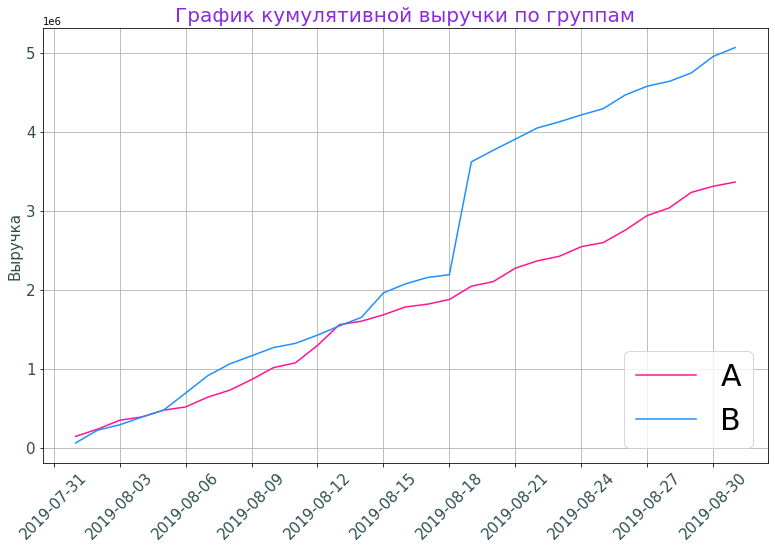

In [30]:
#строию график
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig, ax = plt.subplots(figsize=(13, 8))
                       
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='#FF1493')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='#1E90FF')


plt.xticks(rotation=45, fontsize='15', color='#2F4F4F')
plt.yticks(fontsize='15', color='#2F4F4F')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.ylabel('Выручка', fontsize='15', color='#2F4F4F')
plt.grid()
plt.legend(loc='lower right', fontsize=30) 
plt.title('График кумулятивной выручки по группам', fontsize=20, color = '#8A2BE2');

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Выручка в обеих группах растёт. В группе В выручка стабильно выше, чем в группе А. Особенно большой скачок в группе В на 19й день, после чего рост продолжался. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. В группе А скачков роста нет.

#### График кумулятивного среднего чека по группам.

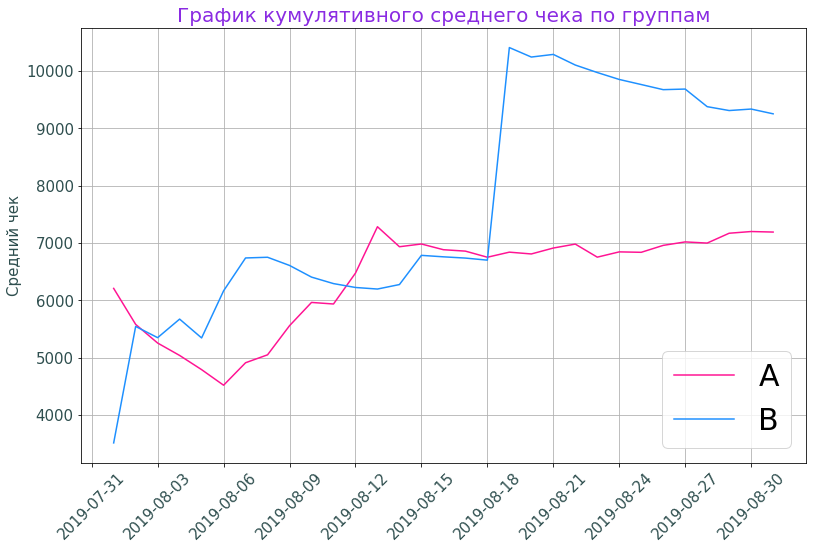

In [31]:
fig, ax = plt.subplots(figsize=(13, 8))

# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color='#FF1493')

# Строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color='#1E90FF')

plt.xticks(rotation=45, fontsize='15', color='#2F4F4F')
plt.yticks(fontsize='15', color='#2F4F4F')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.ylabel('Средний чек', fontsize='15', color='#2F4F4F')
plt.grid()
plt.legend(loc='lower right', fontsize=30) 
plt.title('График кумулятивного среднего чека по группам', fontsize=20, color = '#8A2BE2');

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Линии практически зеркальны. В группе А сильный провал на 6 день, но на 13й день скачек среднего чека, благодаря чему он выше, чем в группе В. На 19й день средний чек резко вырос в группе В. Это и есть причина увеличения выручки в этой группе.

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

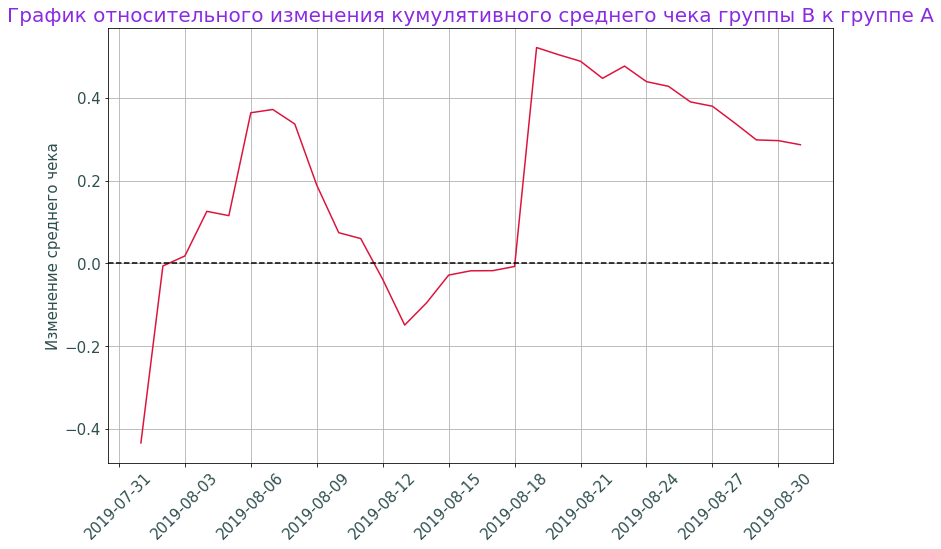

In [32]:
fig, ax = plt.subplots(figsize=(13, 8))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color='#DC143C')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xticks(rotation=45, fontsize='15', color='#2F4F4F')
plt.yticks(fontsize='15', color='#2F4F4F')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.ylabel('Изменение среднего чека', fontsize='15', color='#2F4F4F')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=20, color = '#8A2BE2');

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> В нескольких точках график различия между сегментами резко «скачет». Как и было выше провал на 13й день, скачок роста в 19й. Где-то уж точно спрятались крупные заказы и выбросы.

#### График кумулятивного среднего количества заказов на посетителя по группам.

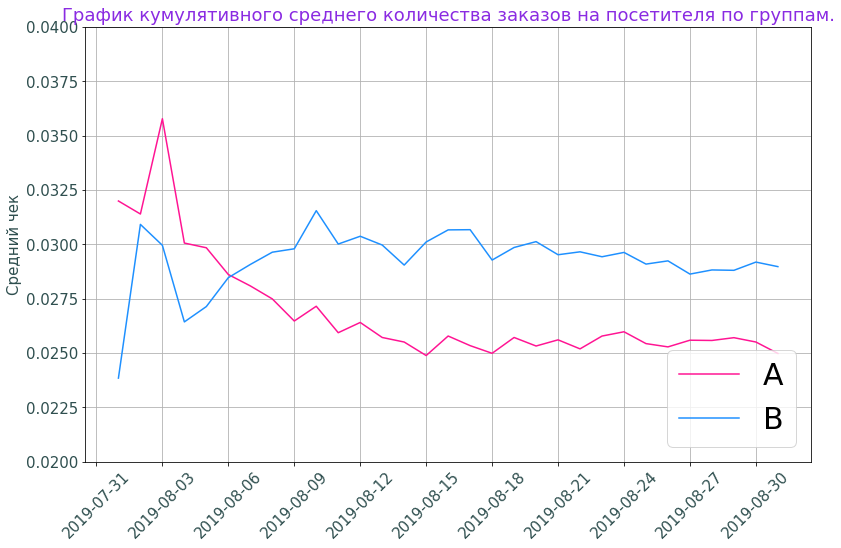

In [33]:
fig, ax = plt.subplots(figsize=(13, 8))

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='#FF1493')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='#1E90FF')

plt.xticks(rotation=45, fontsize='15', color='#2F4F4F')
plt.yticks(fontsize='15', color='#2F4F4F')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.ylabel('Средний чек', fontsize='15', color='#2F4F4F')
plt.grid()
plt.legend(loc='lower right', fontsize=30) 
plt.ylim([0.02, 0.04])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам.', fontsize=18, color = '#8A2BE2');

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Симметричный график получился. Группы колебались около одного значения, но затем среднее число заказов группы В вырвалась вперёд и зафиксировалась, а группы А просела и также зафиксировалась. 

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

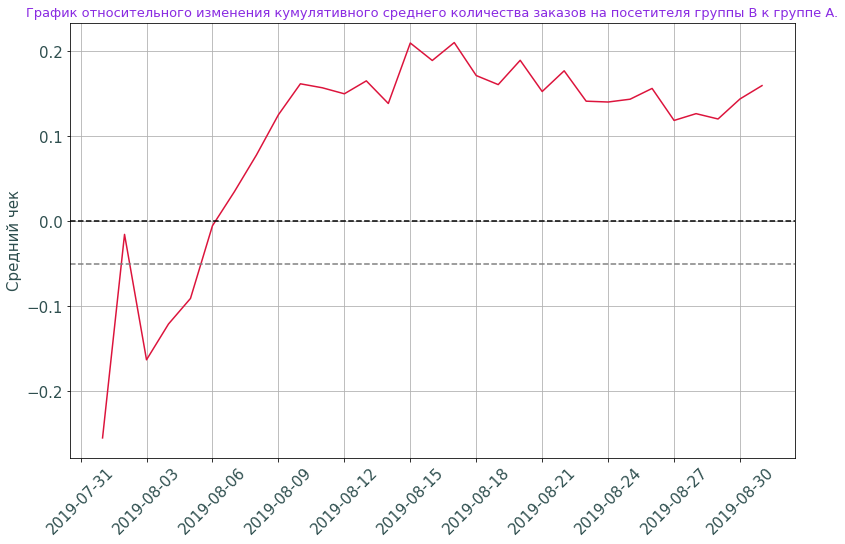

In [34]:
fig, ax = plt.subplots(figsize=(13, 8))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
                              .merge(cumulativeDataB[['date','conversion']]
                              ,left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, color='#DC143C')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.05, color='grey', linestyle='--')

plt.xticks(rotation=45, fontsize='15', color='#2F4F4F')
plt.yticks(fontsize='15', color='#2F4F4F')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.ylabel('Средний чек', fontsize='15', color='#2F4F4F')
plt.grid() 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.',
          fontsize=13, color = '#8A2BE2');

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> В начале теста группа B после резкого скачка стала значительно проигрывать группе A, затем вырвалась вперёд. Потом её конверсия только нарастала, но теперь постепенно падает.

#### Точечный график количества заказов по пользователям.

In [35]:
#сгруппировала по пользователям и отобрала количество уникальных заазов для каждого
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

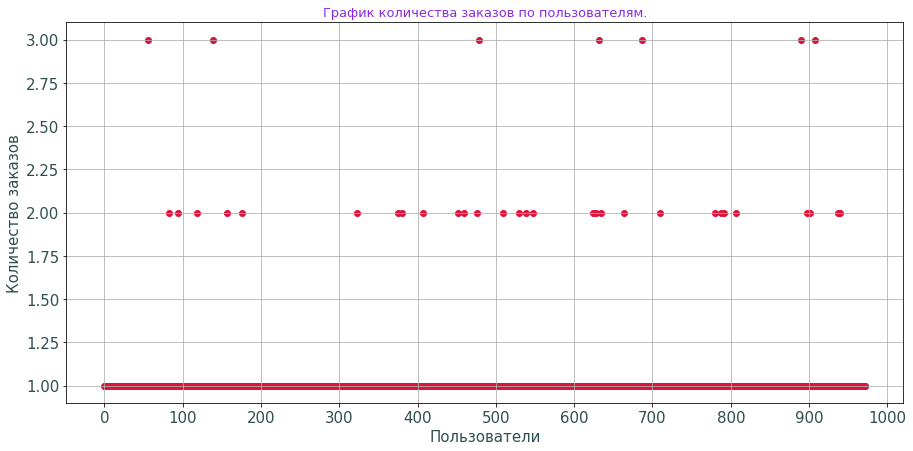

In [36]:
#по ранжированному списку строю график
x_values = pd.Series(range(0,len(ordersByUsers)))

fig, ax = plt.subplots(figsize=(15, 7))

plt.scatter(x_values, ordersByUsers['orders'], color='#DC143C')

plt.xticks(fontsize='15', color='#2F4F4F')
plt.yticks(fontsize='15', color='#2F4F4F')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))
plt.xlabel('Пользователи', fontsize='15', color='#2F4F4F')
plt.ylabel('Количество заказов', fontsize='15', color='#2F4F4F')
plt.grid() 
plt.title('График количества заказов по пользователям.',
          fontsize=13, color = '#8A2BE2');

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Выбросы нет. У некоторых пользователей по 3 заказа максимум. В большинстве своем конечно по 1 заказу.

#### 95-й и 99-й перцентили количества заказов на пользователя.

In [37]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Не более 5% пользователей заказывают больше 1 заказа. Не более 1% больше 2. Предлагаю здесь ничего не удалять.

#### Точечный график стоимостей заказов.

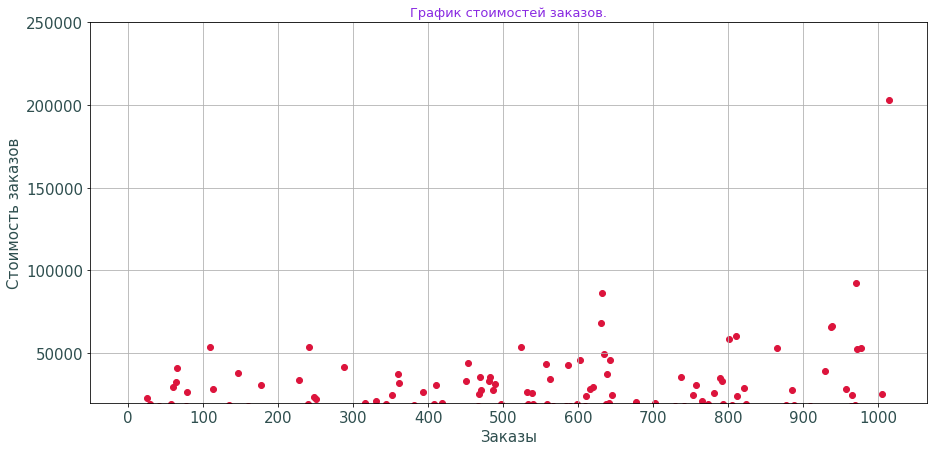

In [38]:
#по ранжированному списку строю график
x_values = pd.Series(range(0,len(orders['revenue'])))

fig, ax = plt.subplots(figsize=(15, 7))

plt.scatter(x_values, orders['revenue'], color='#DC143C')

plt.xticks(fontsize='15', color='#2F4F4F')
plt.yticks(fontsize='15', color='#2F4F4F')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))
plt.xlabel('Заказы', fontsize='15', color='#2F4F4F')
plt.ylabel('Стоимость заказов', fontsize='15', color='#2F4F4F')
plt.ylim([0.02e6, 0.25e6])
plt.grid() 
plt.title('График стоимостей заказов.',
          fontsize=13, color = '#8A2BE2');

#### 95-й и 99-й перцентили  стоимостей заказов.

In [39]:
perc = np.percentile(orders['revenue'], [95, 99])
perc

array([26785., 53904.])

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Не более 5% заказов дороже 26785. Не более 1% дороже 53904. Предлагаю считать выбросами стоимость начиная с 26785 за заказ и удалить их.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

<p></p>

<div style="border:solid black 1px; padding: 20px">Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.</div>

<p></p>

In [40]:
#сгруппировала по пользователям в каждой группе и отобрала количество уникальных заазов для каждого
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [41]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])),
    name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])),
    name='orders')],axis=0)

In [42]:
#Применим критерий mannwhitneyu и отформатируем p-value, округлив его до трёх знаков после запятой
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительная разница:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительная разница: 0.160


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px"> 
<p></p> P-value значительно меньше 0.05. Значит, можно отвергнуть нулевую гипотезу и считать, что в среднем количестве заказов на посетителя есть различия.
Относительные различия в 16%. То есть проверяемая А\В тестом гипотеза хорошо повлияла на количество заказов.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

<p></p>

<div style="border:solid black 1px; padding: 20px"> Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. </div>
<p></p>

In [43]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница:','{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительная разница: 0.287


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p>  P-value значительно больше 0.05. Значит, нельзя отвергнуть нулевую гипотезу и нельзя считать, что в среднем чеке есть различия.
Хотя средний чек на 28% выше у группы В. То есть проверяемая А\В тестом гипотеза не повлияла на средний чек.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

<p></p>

<div style="border:solid black 1px; padding: 20px">Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.</div>

<p></p>

In [44]:
#задаю параметры для очистки выбросов, считаю их количество
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA,
        ordersByUsersB
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > perc[1]]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates()


print('Количество аномальных значений:', abnormalUsers.shape[0]);

Количество аномальных значений: 982


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Выбросов оказалось немного: 982 аномальных значений из 37652. P-value значительно меньше 0.05. Значит, можно отвергнуть нулевую гипотезу и считать, что в среднем количестве заказов на посетителя есть различия.
Относительные различия в 18,5%. Значит, выбросы не повлияли на среднее количество заказов. 

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

<p></p>

<div style="border:solid black 1px; padding: 20px"> Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. </div>
<p></p>

In [46]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.829
Относительная разница: 0.287


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> P-value значительно больше 0.05. Значит, нельзя отвергнуть нулевую гипотезу и нельзя считать, что в среднем чеке есть различия.
Хотя средний чек в читсых данных стал ниже у группы В на 2,8%, чем у группы А. 

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Вот результаты решённых в этом курсе задач в сборе:</b></font>
    <br />
    <br />
    <font color='778899'>  
1) Есть статистически значимое различие по количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.<br />
2) По сырым данным нет статистически значимого различия по среднему чеку между группами. Также после удаления аномалий статистически значимого различия нет.<br />
3) График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения. </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Решение по результатам теста:</b></font>
    <br />
    <br />
    <font color='778899'>  Остановить тест, признать его успешным и перейти к проверке следующей гипотезы. Продолжать тест смысла нет: группа B статистически значимо лучше группы A по одной из метрик, а график конверсии говорит о фиксации результата. </font><p></p>
</div>